In [4]:
import os
os.environ["KERAS_BACKEND"] = "torch"
import numpy as np
import keras_core as keras
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

paths = [
    Path("C:\\Users\\Yisus\\Desktop\\Septimo Semestre\\INT.ARTIFICIAL\\Unidad 4\\Examen\\OriginalDataset\\alzheimer"),
    Path("C:\\Users\\Yisus\\Desktop\\Septimo Semestre\\INT.ARTIFICIAL\\Unidad 4\\Examen\\OriginalDataset\\healthy"),
]
imgs = []
labels = []

for i, path in enumerate(paths):
    img_paths = Path(path).glob("*.jpg")
    img_paths = [str(x) for x in img_paths]
    for img_path in img_paths:
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (250, 250), cv2.INTER_AREA)
        img = img/255.0
        imgs.append(img)
        labels.append(i)
        
imgs = np.array(imgs)
labels = np.array(labels)
print(imgs.shape, labels.shape)

(5440, 250, 250) (5440,)


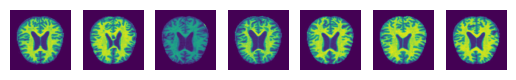

In [8]:
plt.figure()
for i in range(7):
    plt.subplot(1, 7, i+1)
    plt.imshow(imgs[i])
    plt.axis('off')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(250, 250, 1)),
    keras.layers.Conv2D(32, 3, padding='same', strides=1, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', strides=1, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 3, padding='same', strides=1, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(256, 3, padding='same', strides=1, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())

model.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=(keras.optimizers.Adam()),
                metrics=['accuracy'])

model.fit(imgs, labels, epochs=30)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 250, 250, 32)      │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 125, 125, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)      │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 128)       │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 256)       │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 57600)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 512)               │ 29,491,712 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 256)               │    131,328 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 128)               │     32,896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 1)                 │        129 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 30,043,905 (114.61 MB)

 Trainable params: 30,043,905 (114.61 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
 41/170 ━━━━━━━━━━━━━━━━━━━━ 4:29 2s/step - accuracy: 0.5408 - loss: 0.7192

In [ ]:
# Guardar el modelo entrenado
model.save('alzheimer_model.keras')
print("Modelo guardado exitosamente como 'alzheimer_model.keras'")